# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [1]:
# Import libraries
# Our data management libraries
import pandas as pd
import numpy as np

# A basic visualization library
import matplotlib.pyplot as plt

# A great visualization library
import seaborn as sns
# This command tells python to use seaborn for its styling.
sns.set()

# Very important, this will make your charts appear in your notebook instead of in a new window.
%matplotlib inline

# Provides z-score helper function
import scipy.stats as stats

# Load the csv file into a pandas dataframe.


In [2]:
# Load the csv file into a pandas dataframe.
df = pd.read_csv('data/cars.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [3]:
# 1. Print the number of duplicate rows we have in our dataframe.
df.duplicated().sum()


720

In [4]:
#  2. Modify our df to have all duplicate rows removed. 
df = df.drop_duplicates()


In [5]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.
df.duplicated().sum()


0

# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [6]:
# * Which column has the most null values and how many null values does it have?
df.isnull().sum()



Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [7]:
# * Print how long (aka how many rows) our dataframe is.
df.shape[0]


11194

In [8]:
# * Remove any row that has a null value in it. 
df = df.dropna()



In [9]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.
df.shape[0]



11092

### Make a bar chart that displays how many time each brand of car appears in this data. 
_Brand of car is the `Make` of the car._

In [10]:
# Make a bar chart that displays how many times each brand of car appears in this data. 
gb = df.groupby('Make')['Make'].count()
gb



Make
Acura             246
Alfa Romeo          5
Aston Martin       91
Audi              321
BMW               324
Bentley            74
Bugatti             3
Buick             190
Cadillac          396
Chevrolet        1075
Chrysler          187
Dodge             528
FIAT               59
Ferrari            68
Ford              811
GMC               482
Genesis             3
HUMMER             17
Honda             431
Hyundai           259
Infiniti          328
Kia               224
Lamborghini        52
Land Rover        139
Lexus             202
Lincoln           152
Lotus              28
Maserati           55
Maybach            16
Mazda             392
McLaren             5
Mercedes-Benz     340
Mitsubishi        205
Nissan            541
Oldsmobile        132
Plymouth           71
Pontiac           181
Porsche           136
Rolls-Royce        31
Saab              109
Scion              60
Spyker              2
Subaru            239
Suzuki            339
Toyota            713
Volks

# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.

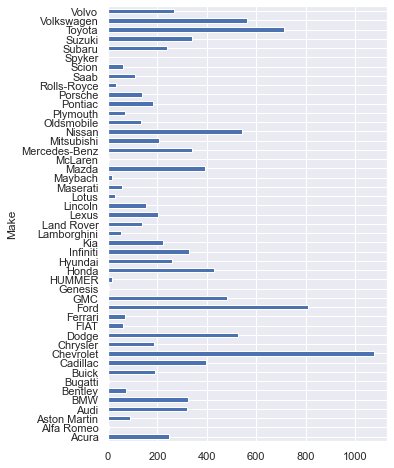

In [11]:
# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.
gb.plot(kind='barh',figsize=(5,8));



### Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
* What's noticeable about it and what do you think the error is...


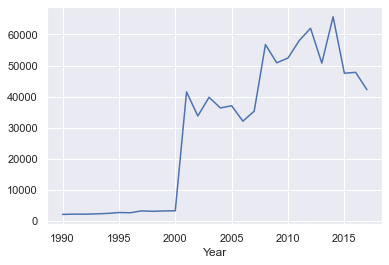

In [12]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
avg_MSRP = df.groupby('Year')['MSRP'].mean() #plotting with groupby instead of dataframe???

MSRP_graph = avg_MSRP.plot(x='Year',y='MSRP',kind='line') #figsize rule?

MSRP_graph;

# It seems as though in the years before 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for 
every year before 2000 make it 10x the original MSRP.

In [13]:
# Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.

c = df['Year'] <= 2000 #2000 still seems off, so I'll include it  

# np.where -> condition, if condition, else condition
df['adjusted_MSRP'] = np.where(c, df['MSRP'] * 10, df['MSRP']) 

df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,adjusted_MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920,50920


# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

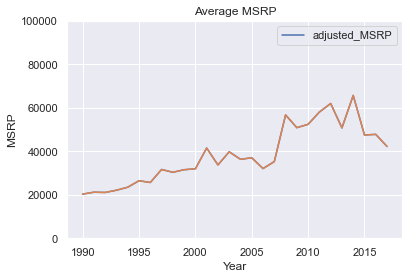

In [14]:
# Replot the new adjusted price and make the y-axis start at 0 and go up to 100,000

# regular plotting
gb = df.groupby('Year')['adjusted_MSRP'].mean() 
gb.plot(kind='line') #figsize rule?

#plotting using seaborn

ax = sns.lineplot(data=gb); #doesn't work when manually plugging in x value prob bc grouby object
ax.set_ylim(0, 100000)
ax.set_title("Average MSRP")
ax.set_ylabel('MSRP')
ax;

# What are the top 5 car makers make the most expensive cars on average. 
* I only want the top 5, make sure your answer is the top 5 and only the top 5. 
* Use our `adjusted_price` column for this

In [15]:
# What are the top 5 car makers make the most expensive cars on average. 

gb = df.groupby('Make')['adjusted_MSRP'].mean()

#option 1 for top 5 
gb.nlargest(5)

#option 2 for top 5 
gb.sort_values(ascending=False).head(5)

Make
Bugatti        1.757224e+06
Maybach        5.462219e+05
Rolls-Royce    3.511306e+05
Lamborghini    3.315673e+05
Bentley        2.471693e+05
Name: adjusted_MSRP, dtype: float64

# What are the top 5 car makers that have the highest median highway MPG?

In [16]:
# Which car makers have the highest median highway MPG?
gb = df.groupby('Make')['highway MPG'].median()

#top 5 
gb.sort_values(ascending=False).head(5)



Make
Alfa Romeo    34
FIAT          33
Volkswagen    32
Scion         32
Honda         32
Name: highway MPG, dtype: int64

# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
* ['Chevrolet', 'Ford', 'Toyota']

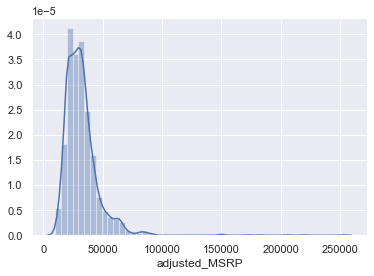

In [17]:
# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
makes = ['Chevrolet', 'Ford', 'Toyota']
c = df['Make'].isin(makes)
ax = sns.distplot(df[c]['adjusted_MSRP'])

# Remake the same histogram, but limit the x-axis from 0 to 100,000

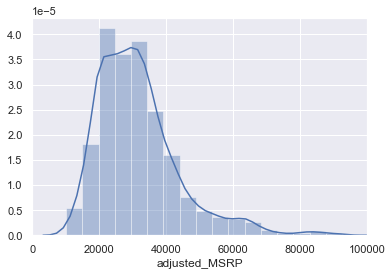

In [18]:
# Remake the same histogram, but limit the x-axis from 0 to 100,000
makes = ['Chevrolet', 'Ford', 'Toyota']
c = df['Make'].isin(makes)
ax = sns.distplot(df[c]['adjusted_MSRP']).set_xlim(0,100000)


# Plot the relationship between Engine HP and highway MPG

<AxesSubplot:xlabel='Engine HP', ylabel='highway MPG'>

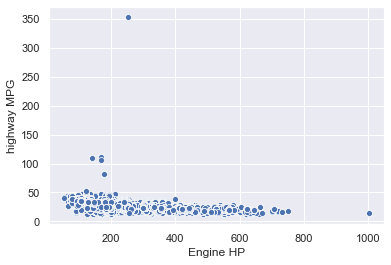

In [19]:
# Plot the relationship between Engine HP and highway MPG
sns.scatterplot(data=df,
                x='Engine HP',
                y='highway MPG')



# Remove any statisical outliers from Engine HP and highway MPG and plot the result.
* Statisical outliers meaning values that are further than 3 standard deviations from the mean 
* Create a new columns for z-scores for each 'Engine HP' and 'highway MPG' named 'Engine HP_zscore' and 'highway MPG_zscore'
* Calculate the z-scores for each of our target columns.
* Make sure you set the z-scores to be their absolute values. 
* Create condition masks for when either of those absolute values are greater than 3.

* Create a new dataframe that is a copy of our dataframe using df.copy()

* Using our new dataframe
    * Filter out all Engine HP Z-Scores that are greater than 3
    * Filter out all Highway MPG z-scores that are greater than 3.
    * Make the same scatterplot plotting the relationship of Engine HP and Highway MPG as before but with the this dataframe.

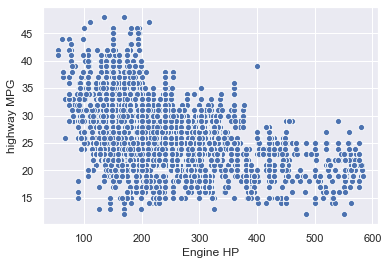

In [20]:
# Remove any statisical outliers from Engine HP and highway MPG

numerical_cols = ['Engine HP', 'highway MPG']

#empty list that will store our new z-score column names in
z_score_cols = []

#Loop through the numerical columns
for col in numerical_cols:
    
    #create a new col name that is the old olumn name + 'z_score'
    new_col_name = col + '_zscore'
    
    #call the zscore function on the numerical column in our dataframe
    #and set it equal to our new column name
    df[new_col_name] = stats.stats.zscore(df[col])
    
    #Covert all values into absolute values
    df[new_col_name] = abs(df[new_col_name])
    
    #Append the new column name to our z_scor_cols list for easier access
    z_score_cols.append(new_col_name)
 

#seletion mask, so anywhere the zscore is greater than 3
#condition = df[z_score_cols] < 3 did not work!!!
c1 = df['Engine HP_zscore'] > 3
c2 = df['highway MPG_zscore'] > 3

#copy of dataframe
new_df = df.copy()

#filtering
new_df = new_df[ ~c1 & ~c2]

sns.scatterplot(data=new_df,
                x='Engine HP',
                y='highway MPG');

# What does this plot tell you about how Engine HP affects highway MPG?

In [21]:
# What does this plot tell you about how Engine HP affects highwayMPG?

print('The Engine HP has a medium negative correlation with the highway MPG values')

The Engine HP has a medium negative correlation with the highway MPG values


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

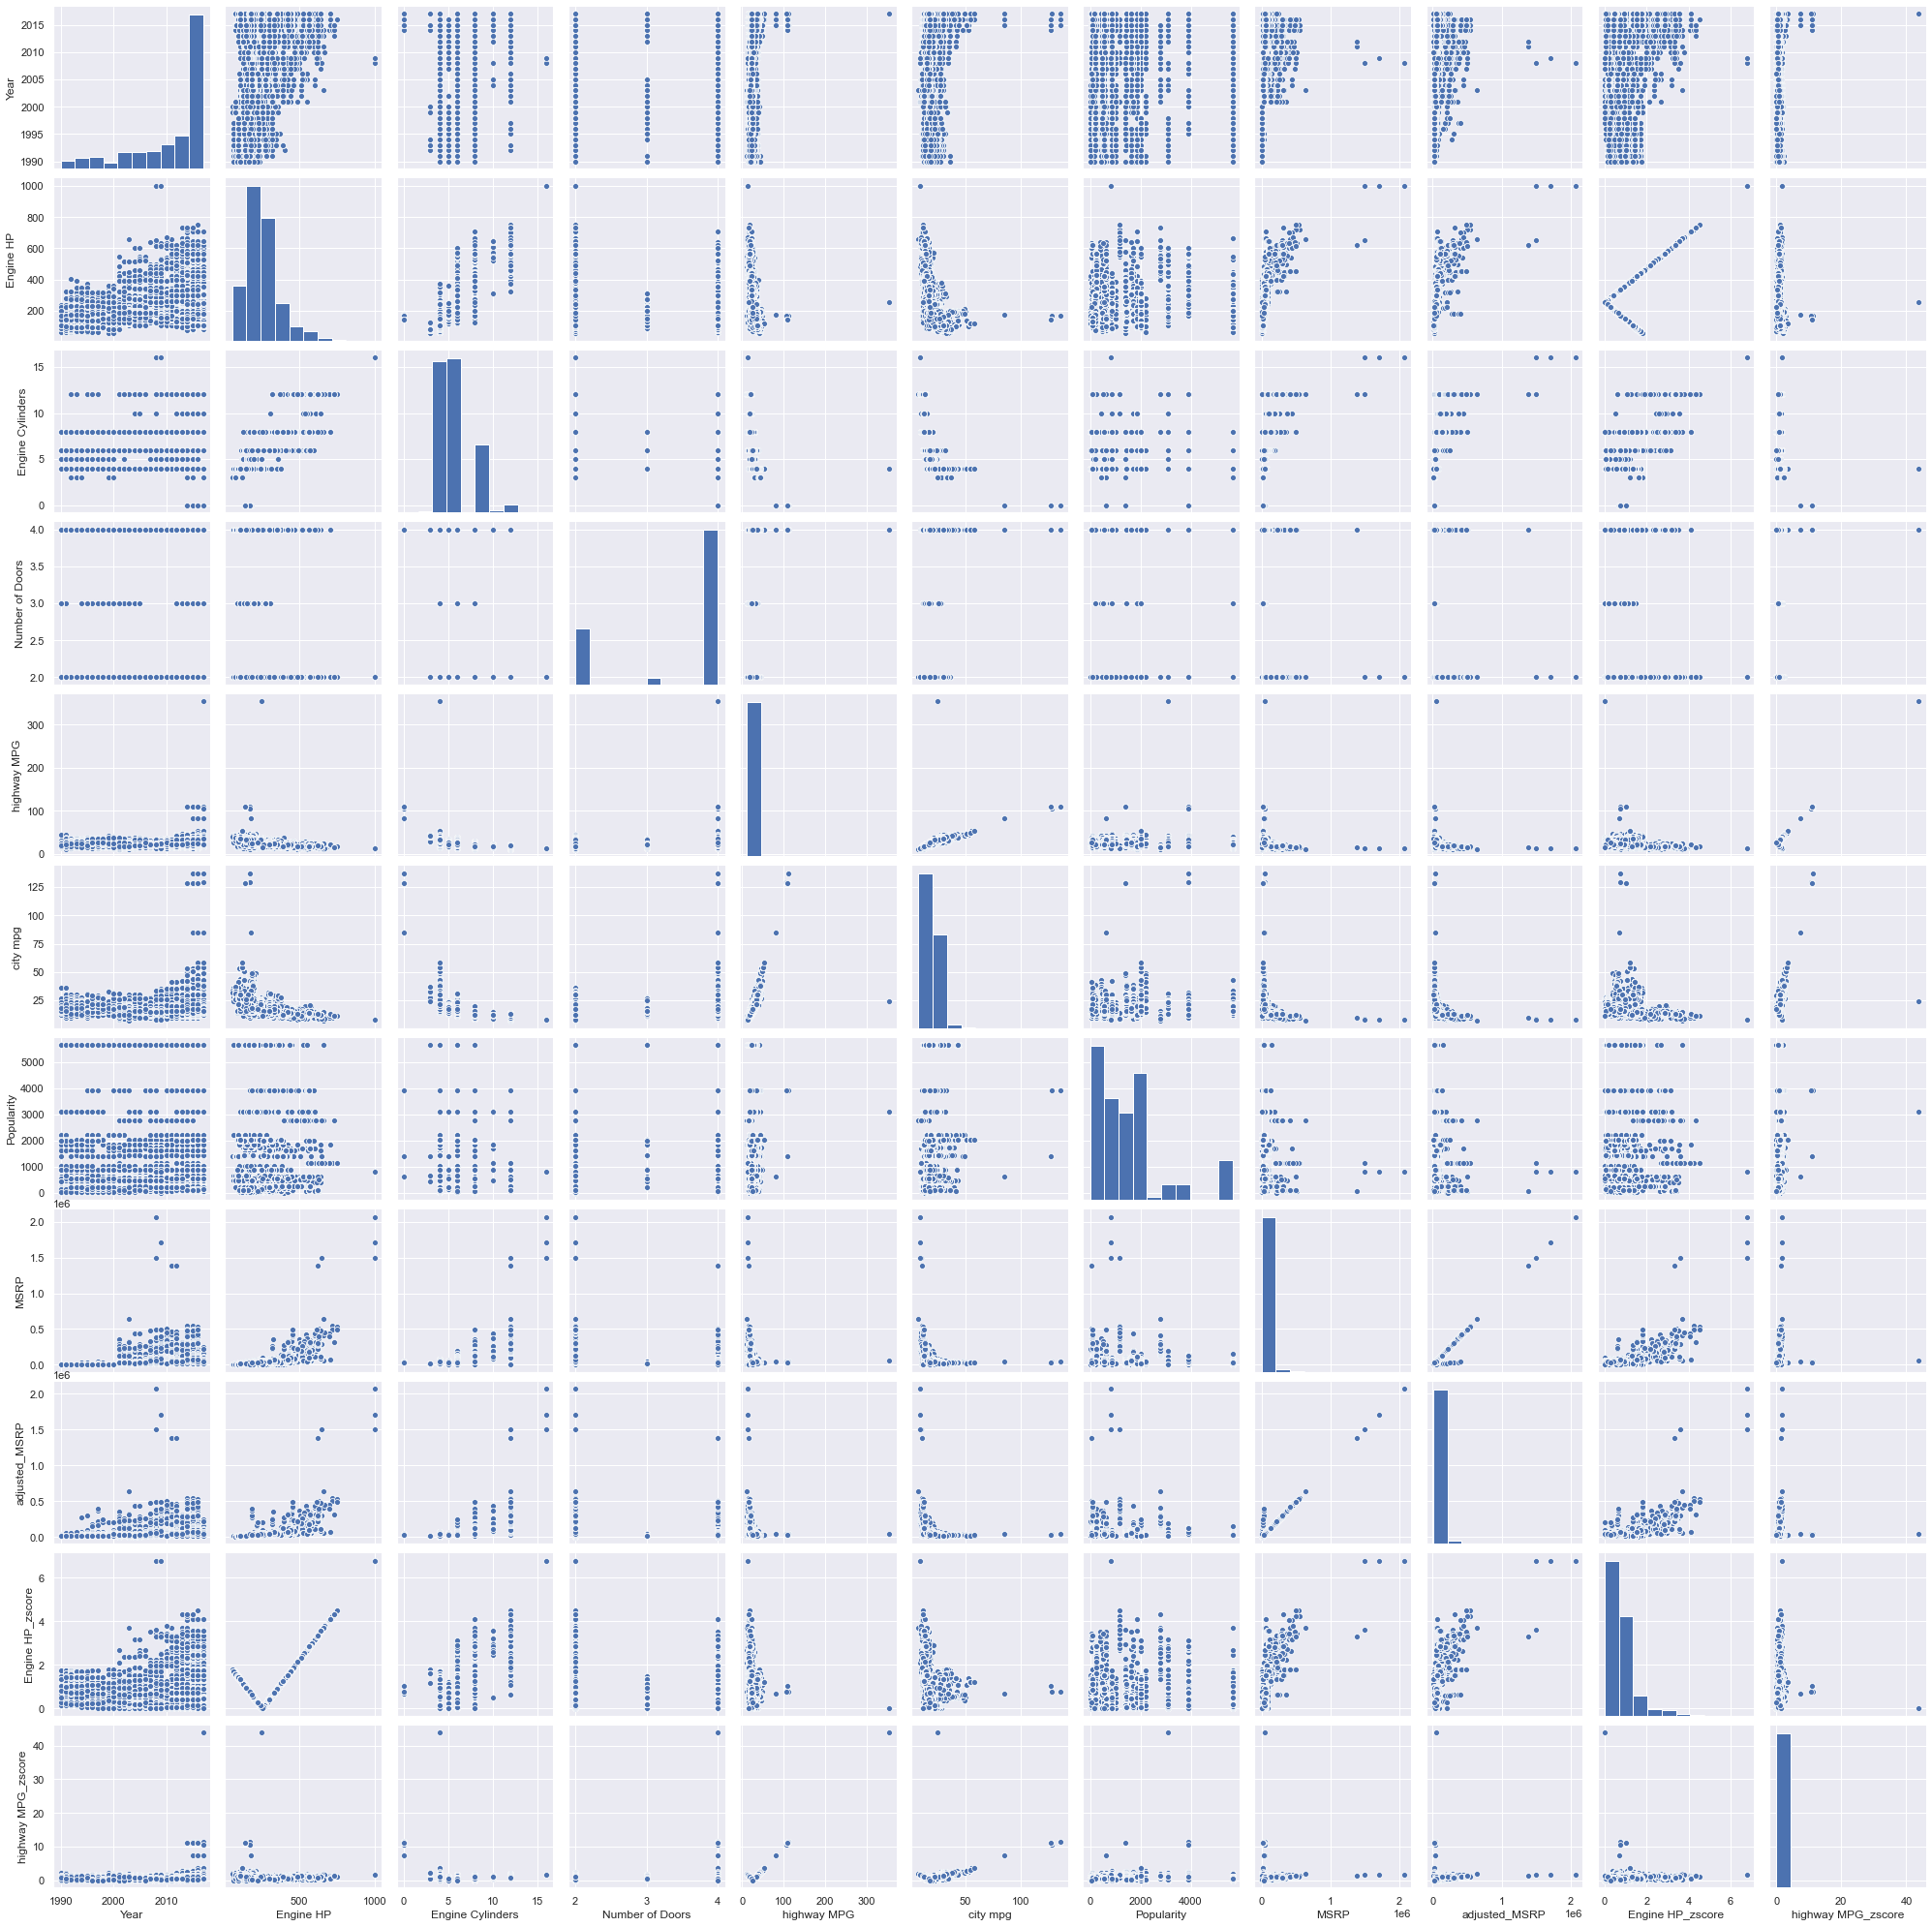

In [22]:
# Using a pairplot, display all of the linear relationship.
sns.pairplot(df);



In [23]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).
print('city mpg and highway mpg')


city mpg and highway mpg


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

Engine Hp has the strongest relationship with Engine Cylinders. This is beacuse the more cylinders -> more horsepower


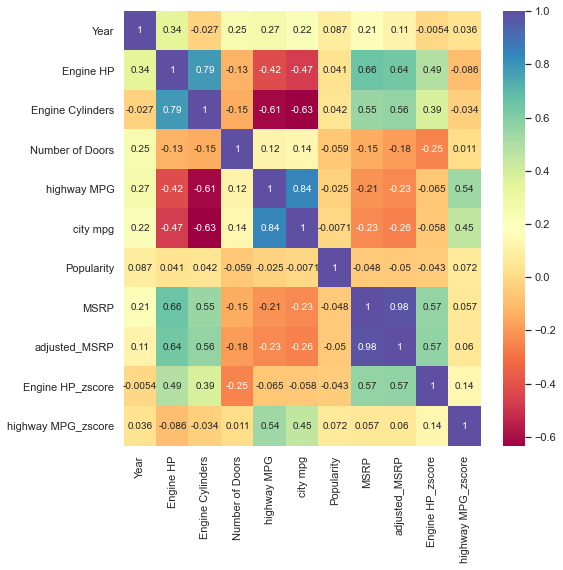

In [24]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cmap='Spectral')
print('Engine Hp has the strongest relationship with Engine Cylinders. This is beacuse the more cylinders -> more horsepower')

# [EXTRA CREDIT] 
* In the column names, replace all the spaces with an underscore, and make them all lowercase as well
* Using subplots, display the histogram of adjusted_price for 'Ford' and 'Toyota' appear on charts side by side. 
    * `f, axes = plt.subplots(1, 2, figsize=(13,5))`



In [25]:
# * In the column names, replace all the spaces with an underscore, and make them all lowercase as well

#Looping through the dataframe's column names
for col_name in df.columns:
    
    #assigning lowercase version of col_name
    new_col_name = col_name.lower()
    
    #replacing spaces with '_'
    new_col_name = new_col_name.replace(' ', '_')
    
    #renaming columns
    df = df.rename(columns={col_name :new_col_name})
df.head()


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,adjusted_msrp,engine_hp_zscore,highway_mpg_zscore
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,46135,0.739442,0.036479
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,40650,0.421779,0.230863
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,36350,0.421779,0.230863
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,29450,0.213547,0.230863
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,34500,0.213547,0.230863


TypeError: distplot() got an unexpected keyword argument 'data'

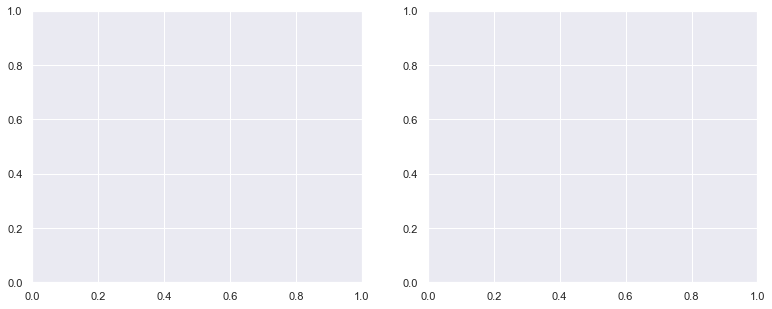

In [27]:
#Using subplots, display the histogram of adjusted_price for 'Ford' and 'Toyota' appear on charts side by side.
f, axes = plt.subplots(1, 2, figsize=(13,5))
# makes = ['Ford', 'Toyota']
# c = df['make'].isin(makes)
# makes_df = df[c]
# sns.distplot(data=makes_df, )


